<h1><center>Foundation of Machine Learning</center></h1>
<h2>
<hr style=" border:none; height:3px;">
<center>Project : Spotify Recommender</center>
<hr style=" border:none; height:3px;">
</h2>

### Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

import numpy as np
import sklearn 
from sklearn import model_selection
import Recommenders
import Evaluation

# Prepare the Dataset

In [2]:
# Read the data
df = pd.read_csv('final.csv', index_col=0)

#Merge song title and artist_name columns to make a merged column
df['song'] = df['title'].map(str) + " - " + df['artist_name']   
#Drop unneccesary columns
df.drop(['title', 'artist_name'], axis=1, inplace=True)

In [3]:
# Minimal number of songs a user must have listened to be kept in our dataset
min_songs = 10
# Minimal number of times a song must have been listened to be kept in our dataset
min_listenings = 20

In [4]:
# Count how many songs each user listened to
df['user_n_songs'] = df.groupby('user_id')['song'].transform('count')

# Count how many users listened to each song
df['song_n_users'] = df.groupby('song')['user_id'].transform('count')

# Keep all the users that listened to at least n songs
df = df[df['user_n_songs'] >= min_songs].drop_duplicates()

# Keep only the songs that were listened by at least 10 users
df = df[df['song_n_users'] >= min_listenings].drop_duplicates()

In [5]:
user_ids = df[['user_id']].drop_duplicates()
df_test = df[['song', 'user_id', 'play_count']].reset_index(drop=True)
df_test.head()

,song,user_id,play_count
0,Tu Quieres Volver - Gipsy Kings,ee7aa84c164038c963cfd02a7e52a5598aa470c3,2
1,Tu Quieres Volver - Gipsy Kings,1aa4fd215aadb160965110ed8a829745cde319eb,1
2,Tu Quieres Volver - Gipsy Kings,cca2694a19b2474bc731574ebb8b10382214f865,2
3,Tu Quieres Volver - Gipsy Kings,681064acdadcfeca36237d157f96a2be48b9ded0,4
4,Tu Quieres Volver - Gipsy Kings,2449f618b43cc1f407670dab3a7f129a127cda4a,1


# Recommenders

In this part, we will create, test and evaluate different model to give recommendations. The different recommender can be found in the file `Recommenders.py`, and the functions to evaluate the recommenders can be found in `Evaluation.py`.

In [12]:
evaluation = Evaluation.Evaluation(user_ids, df_test, seed)

seed = 123
sample_fraction = 0.7

In [7]:
user_items = df_test[df_test['user_id'] == 'ee7aa84c164038c963cfd02a7e52a5598aa470c3']
user_items = user_items.sort_values(by='play_count', ascending=False)
user_items

,song,user_id,play_count
12854,Just Say Yes - Snow Patrol,ee7aa84c164038c963cfd02a7e52a5598aa470c3,19
19902,Tercer Mundo - Fito Paez,ee7aa84c164038c963cfd02a7e52a5598aa470c3,3
0,Tu Quieres Volver - Gipsy Kings,ee7aa84c164038c963cfd02a7e52a5598aa470c3,2
15206,Asesíname - Charly García,ee7aa84c164038c963cfd02a7e52a5598aa470c3,2
18720,All Alone (Live) - Gorillaz,ee7aa84c164038c963cfd02a7e52a5598aa470c3,2
19178,The Ultimate - The Roots,ee7aa84c164038c963cfd02a7e52a5598aa470c3,2
113,I'm Back - Eminem,ee7aa84c164038c963cfd02a7e52a5598aa470c3,1
17894,Paralyzed - The Cardigans,ee7aa84c164038c963cfd02a7e52a5598aa470c3,1
18785,Verano traidor - Vilma Palma e Vampiros,ee7aa84c164038c963cfd02a7e52a5598aa470c3,1
20622,Sencillamente - Bersuit Vergarabat,ee7aa84c164038c963cfd02a7e52a5598aa470c3,1


## Simple Recommender based on Popularity

This simple model recommends songs to users based only on their popularity. This is a first naive approach as it is not a personalized recommendation: all users will get the same recommendations.

In [8]:
reco_pop = Recommenders.PopularityRecommender(df_test)

# Example with user ee7aa84c164038c963cfd02a7e52a5598aa470c3
reco_pop.recommend('ee7aa84c164038c963cfd02a7e52a5598aa470c3', 10)[0]

,song,score,Rank
1084,Supermassive Black Hole (Album Version) - Muse,488,1.0
180,Check On It - Beyoncé feat. Slim Thug,466,2.0
295,Don't Panic - Coldplay,450,3.0
83,Baby Boy [feat. Beyonce] - Sean Paul,420,4.0
830,One I Love - Coldplay,386,5.0
13,A Dustland Fairytale - The Killers,361,6.0
908,Ragoo - Kings Of Leon,355,7.0
804,Nothin' On You [feat. Bruno Mars] (Album Version) - B.o.B,333,8.0
225,Crawling (Album Version) - Linkin Park,309,9.0
58,Angie (1993 Digital Remaster) - The Rolling Stones,308,10.0


### Evaluation of the model

Accuracy of    the first suggestion  :    22.60% (0.20007774425804925, 0.25192225574195076)
Accuracy of the  5 first suggestions :    21.08% (0.19949444387292414, 0.22210555612707583)
Accuracy of the 10 first suggestions :    18.13% (0.173748914491228, 0.18885108550877197)
Accuracy of the 20 first suggestions :    15.40% (0.14904693331112376, 0.15905306668887623)


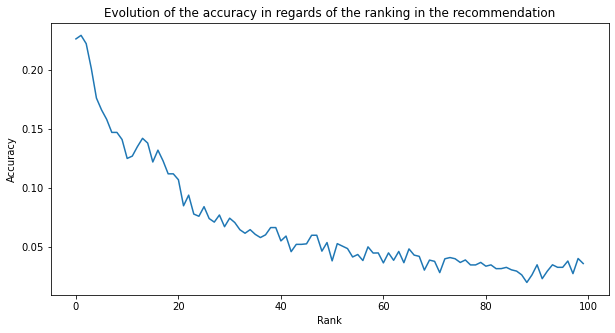

In [9]:
evaluation.evaluate(reco_pop.recommend, 1000)

## Recommender based on Item Similarity

This model recommends songs to users based on TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

In [10]:
reco_sim = Recommenders.ItemSimilarityRecommender(df_test, seed, sample_fraction)

# Example with user ee7aa84c164038c963cfd02a7e52a5598aa470c3
reco_sim.recommend('ee7aa84c164038c963cfd02a7e52a5598aa470c3', 10)[0]

,user_id,song,score,rank
0,,Asesíname - Charly García,0.078531,1
1,,Marvel Hill - The Cardigans,0.076464,2
2,,Iron Man - The Cardigans,0.060365,3
3,,Rise & Shine - The Cardigans,0.055878,4
4,,Verano traidor - Vilma Palma e Vampiros,0.050510,5
5,,Todo A Pulmón - Alejandro Lerner,0.041827,6
6,,A Veces Vuelvo - Catupecu Machu,0.041456,7
7,,De Onda - Bersuit Vergarabat,0.038896,8
8,,Melodia Simple - La Mancha De Rolando,0.035577,9
9,,Smile Jamaica - Bob Marley & The Wailers,0.033809,10


### Evaluation of the model

Accuracy of    the first suggestion  :    58.00% (0.4832643101683205, 0.6767356898316794)
Accuracy of the  5 first suggestions :    37.60% (0.3335429997680821, 0.4184570002319179)
Accuracy of the 10 first suggestions :    28.59% (0.25781177609539335, 0.3139033693409156)
Accuracy of the 20 first suggestions :    20.57% (0.18748294008701455, 0.2239698700932612)


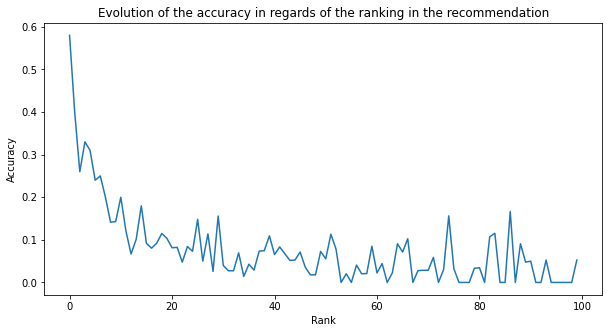

In [11]:
evaluation.evaluate(reco_sim.recommend, 100)

## Recommender based on Play Count

This model recommends songs to users based on TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO.

It is now important to create another model based on play_count and not only on rather the user has listened to the music or not. Let's try to call our system based on ratings.

In [15]:
reco_play = Recommenders.PlayCountRecommender(df_test, seed, sample_fraction)

# Example with user ee7aa84c164038c963cfd02a7e52a5598aa470c3
reco_play.recommend('ee7aa84c164038c963cfd02a7e52a5598aa470c3', 10)[0]

,song,score
0,Desde el este - Facto Delafe y las flores azules,13.072471
1,Down (LP Version) - Stone Temple Pilots,3.866814
2,Do You Want To - Franz Ferdinand,3.201539
3,Stop Breaking Down (1994 Digital Remaster) - The Rolling Stones,3.123605
4,Supermassive Black Hole (Album Version) - Muse,2.925513
5,I'm Down - Goldfinger,2.524108
6,Rocks Off - The Rolling Stones,2.285173
7,Simple Twist Of Fate - Bob Dylan,2.228204
8,Angie (1993 Digital Remaster) - The Rolling Stones,2.092430
9,Valerie - Amy Winehouse,1.961727


### Evaluation of the model

Accuracy of    the first suggestion  :    0.00% (0.0, 0.0)
Accuracy of the  5 first suggestions :    0.00% (0.0, 0.0)
Accuracy of the 10 first suggestions :    0.00% (0.0, 0.0)
Accuracy of the 20 first suggestions :    0.00% (0.0, 0.0)


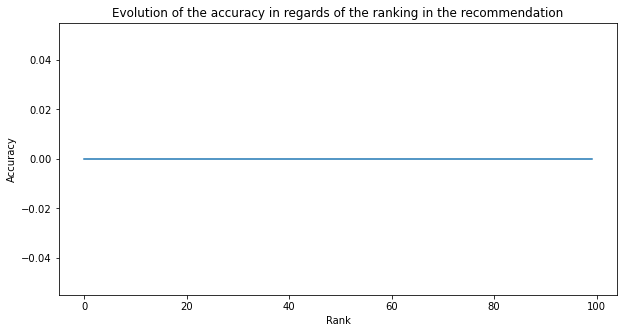

In [16]:
evaluation.evaluate(reco_play.recommend, 30)